In [2]:
import requests
import pandas as pd
# Replace YOUR_API_KEY with the API key you obtained from Yelp
api_key = "F19Qu5GtbqN1a5Kwh_ab0KscXqu6bzCvJfMMK_l9dkeAmkUG9S51nhrSA87__D56zuaaQ8h_r58MLBW2zpebkLTre4AJjI9U7DFOIYhr2IQ7tsU6gM8wNEir-6PFZHYx"

def get_business_reviews(api_key, business_id):
    url = f"https://api.yelp.com/v3/businesses/{business_id}/reviews"

    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    try:
        response = requests.get(url, headers=headers)
        response_data = response.json()

        if "reviews" in response_data:
            reviews = response_data["reviews"]
            return [review["text"] for review in reviews]
        else:
            print("Error: Reviews not found in the response.")
            return []

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return []


def get_business_ids(api_key, location, term, limit=50):
    url = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    params = {
        "location": location,
        "term": term,
        "limit": limit
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        response_data = response.json()

        business_ids = []
        if "businesses" in response_data:
            for business in response_data["businesses"]:
                business_ids.append(business["id"])

        return business_ids

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return []

location = "Canada"
term = "canada post"  # You can specify other terms like "hotels", "coffee", etc.
business_ids = get_business_ids(api_key, location, term)
# Print the collected business IDs
print(business_ids)

# business_ids = ['3ARTHkcE4yltyx8rF2yShA', 'UPJtlS_AHERWBbdBPH2n6A', 'wNbMERhha6uLREkrLobP5A', 'KMRN-gUi2A42GHvsFCf5pA', '0gF4-D1TlbQf9oQGZLOtRQ', '8T9DlB0WPzBYPs2y5fE_Rg', 'PF-t5mllzy1MKPzvMUIfLg', 'PPyh_zK_Cy6f7ek6S1j4kA', 'QWNS5LarKOUCgLCJ3hOl4Q', '36RFNPXKhqUdiSsy2AiTcA', 'Bwe2gSOLs4EXzG-QDKTrgg', 'hs-MiF4_AfRIQgCKDfgrA', 'tQWGRIdcblxhZCPI4bGo5Q', '4A79qe1Zr8udz8bbrHvMTw', '6azyk7cGXxCrZRh34fp8Pw', 'GXeit8tipzuGqMoYIvQgiA', 'O0W7w2sQlU6WFPrpRqFR-Q', 'R2taBYOO5-9s4xjJeAjpWw', 'S1zyBXsLEYZY6BWExNx7hw', 'tuNYv9UDi9ff3DSpiKmbig', 'VYxLUFqQbPS0YWCajunTdQ', 'afoYUjmSVkmEWn1ibc14dg', 'FJWILKwbewPXD-RnilC3Sg', 'I65sf6T4JEzRdMicM7WkBQ', 'D_QCAVDC8sHVYw-d5s0VQ', 'Z3HZRssmMElRr3andJ_z5g', 'znSvwiZHxwkuT0mU4x69lQ', 'eOsJq9qwofjnAj9Vhh6CHg', 'Yt2ceejqDwJqzUttL7tf0g', 'V88PUrISvHGPqzBPqEbQvg', 'OufttkR9vXJTSpCNpSD4tg', 'Pf9IJUev8emwspEtUgmlUQ', 'SH1WIsCq1FJ9SbGEssYO3Q', 'pbsPCSG_kkdt04rbdcDKyA', 'U2YxiCXDy47MUyprcEq5Pw', 'iBL4wz8nmZ_74HFvfXdhwQ', '-uMbu8On8-uBNf3t5dLiQA', 'PLT3XSda-NdsxZScBUe3cA', 'W36mJ8QSukCWWOydEZ5DxQ', '908kVsdJLVX8IGbxss--2w', 'TpXHV6fUH_GhdFmUbV32YA', 'EK8lXwDt_XvpQhVSj6beBQ', 'rNvxnwpauRH2IspHhHHrZA', 'xE6_6lrWHmcv2hVwWxHwiw', 'nWnU2oPJIXTek0P9QWFUvA', 'hjbQVIGdnWEigxkKqezm7Q', 'rZiZSUytyBjqCoOFhKrq5A', 'vJzbBZA17ruViEn12bjj7g', 'X7i_Q8_o-hPyvugz0k1yJg', '7QPUy7ujIQR3Un0tUlNitA']# Replace with the Yelp ID of the business you want to get reviews for
# business_id = "3ARTHkcE4yltyx8rF2yShA"
reviews_data = []
for business_id in business_ids:
    reviews = get_business_reviews(api_key, business_id)
    reviews_data.extend(reviews)
# Create a DataFrame
df = pd.DataFrame({"Reviews": reviews_data})

# Print the DataFrame
print(df)

['3ARTHkcE4yltyx8rF2yShA', 'UPJtlS_AHERWBbdBPH2n6A', 'wNbMERhha6uLREkrLobP5A', 'KMRN-gUi2A42GHvsFCf5pA', '0gF4-D1TlbQf9oQGZLOtRQ', '8T9DlB0WPzBYPs2y5fE_Rg', 'PF-t5mllzy1MKPzvMUIfLg', 'PPyh_zK_Cy6f7ek6S1j4kA', 'QWNS5LarKOUCgLCJ3hOl4Q', '36RFNPXKhqUdiSsy2AiTcA', 'Bwe2gSOLs4EXzG-QDKTrgg', '_hs-MiF4_AfRIQgCKDfgrA', 'tQWGRIdcblxhZCPI4bGo5Q', '4A79qe1Zr8udz8bbrHvMTw', '6azyk7cGXxCrZRh34fp8Pw', 'GXeit8tipzuGqMoYIvQgiA', 'O0W7w2sQlU6WFPrpRqFR-Q', 'R2taBYOO5-9s4xjJeAjpWw', 'S1zyBXsLEYZY6BWExNx7hw', 'tuNYv9UDi9ff3DSpiKmbig', 'VYxLUFqQbPS0YWCajunTdQ', 'afoYUjmSVkmEWn1ibc14dg', 'FJWILKwbewPXD-RnilC3Sg', 'I65sf6T4JEzRdMicM7WkBQ', 'D__QCAVDC8sHVYw-d5s0VQ', 'Z3HZRssmMElRr3andJ_z5g', 'znSvwiZHxwkuT0mU4x69lQ', 'eOsJq9qwofjnAj9Vhh6CHg', 'Yt2ceejqDwJqzUttL7tf0g', 'V88PUrISvHGPqzBPqEbQvg', 'Pf9IJUev8emwspEtUgmlUQ', 'OufttkR9vXJTSpCNpSD4tg', 'SH1WIsCq1FJ9SbGEssYO3Q', 'U2YxiCXDy47MUyprcEq5Pw', 'pbsPCSG_kkdt04rbdcDKyA', 'iBL4wz8nmZ_74HFvfXdhwQ', '-uMbu8On8-uBNf3t5dLiQA', 'PLT3XSda-NdsxZScBUe3cA', 'W36mJ8QSuk

In [3]:
file_path = 'reviews_yelp_data.xlsx'

# Export the DataFrame to Excel
df.to_excel(file_path, index=False)

# Print a message to indicate that the data has been exported successfully
print(f"Data has been successfully exported to {file_path}.")

Data has been successfully exported to reviews_yelp_data.xlsx.


In [5]:
# Step 3: Convert text to lowercase
df["Reviews"] = df["Reviews"].str.lower()

In [6]:
# Step 1: Remove duplicate reviews
df.drop_duplicates(subset=["Reviews"], inplace=True)

In [7]:
# Step 2: Remove reviews with missing or empty text
df.dropna(subset=["Reviews"], inplace=True)

In [8]:
# Step 4: Remove punctuation and special characters
import re
df["Reviews"] = df["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

In [9]:
# Step 5: Remove extra whitespaces
df["Reviews"] = df["Reviews"].apply(lambda x: " ".join(x.split()))

In [10]:
# Step 6: Tokenization (splitting text into individual words or tokens)
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer
nltk.download('punkt')

# Tokenize the reviews
df["Tokenized_Reviews"] = df["Reviews"].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
from nltk.tokenize import sent_tokenize
# Sentence tokenize the reviews
df["Sentence_Tokens"] = df["Reviews"].apply(sent_tokenize)

In [12]:
# Step 7: Stopword Removal (removing common words that don't add much value)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df["Filtered_Reviews"] = df["Tokenized_Reviews"].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Calculate Total Words Before and After Stopword Removal
total_words_before_removal = df["Reviews"].str.split().apply(len).sum()
total_words_after_removal = df["Filtered_Reviews"].apply(len).sum()

print("Total words before removal:", total_words_before_removal)
print("Total words after removal:", total_words_after_removal)

Total words before removal: 2917
Total words after removal: 1554


       Sentiment Score  Review Length
count       106.000000     106.000000
mean          0.047280     146.113208
std           0.574669      13.412376
min          -0.920900      77.000000
25%          -0.451100     147.000000
50%           0.000000     150.000000
75%           0.577200     151.000000
max           0.940300     155.000000


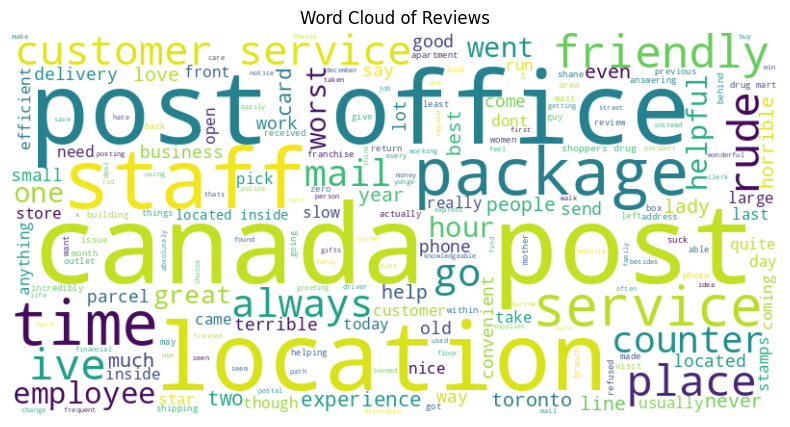

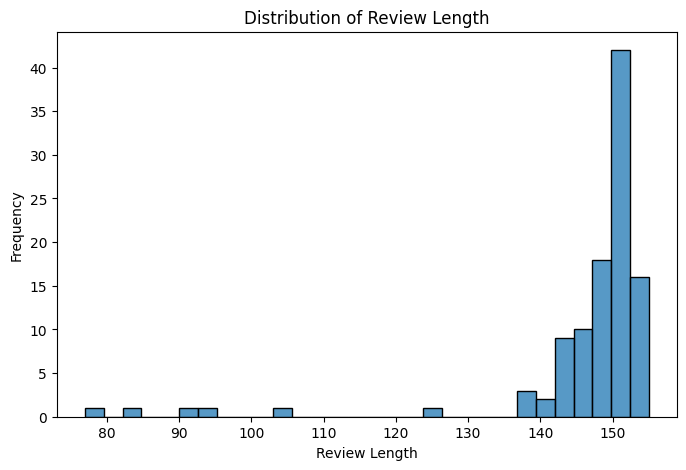

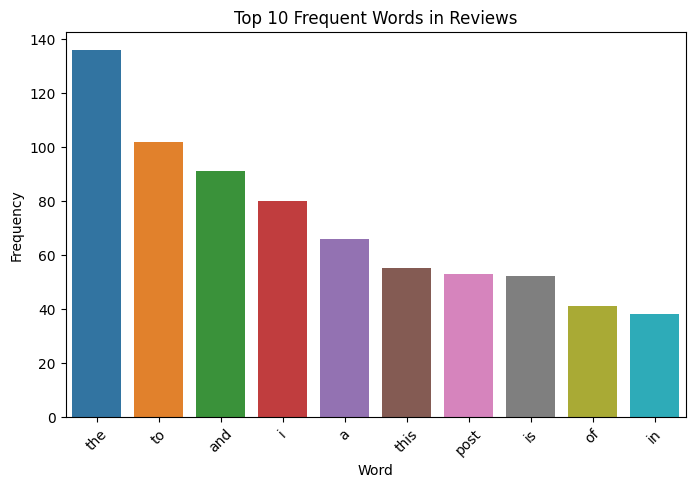

In [29]:
# EDA
# Summary statistics
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())

# Word cloud to visualize frequently occurring words in the reviews
from wordcloud import WordCloud

all_text = " ".join(review for review in df["Reviews"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# Distribution of review lengths
df["Review Length"] = df["Reviews"].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Review Length", bins=30)
plt.title("Distribution of Review Length")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Top frequent words in the reviews
from collections import Counter

words_counter = Counter(" ".join(df["Reviews"]).split())
top_words = words_counter.most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
plt.figure(figsize=(8, 5))
sns.barplot(data=top_words_df, x="Word", y="Frequency")
plt.title("Top 10 Frequent Words in Reviews")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [14]:
# Stemming
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer if not already downloaded
nltk.download('punkt')

stemmer = PorterStemmer()

def stem_sentence(sentence):
    return [stemmer.stem(token) for token in sentence]

df["Stemmed_Sentences"] = df["Tokenized_Reviews"].apply(stem_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
nltk.download('wordnet')  # Download the WordNet lexicon

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    return [lemmatizer.lemmatize(word) for word in sentence]

df["Lemmatized_Sentences"] = df["Tokenized_Reviews"].apply(lemmatize_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
# Handling Acronyms and Slang Words
expanded_terms = {
    'nlp': 'natural language processing',
    # Add more acronyms or slang words and their expanded forms as needed
}

def expand_acronyms_and_slang(tokens):
    return [expanded_terms.get(token, token) for token in tokens]

df["Expanded_Sentences"] = df["Lemmatized_Sentences"].apply(expand_acronyms_and_slang)


In [17]:
!pip install autocorrect
import autocorrect

# Correcting Misspelled Words
spell = autocorrect.Speller(lang='en')

def correct_spelling(tokens):
    return [spell.autocorrect_word(token) for token in tokens]

df["Corrected_Sentences"] = df["Expanded_Sentences"].apply(correct_spelling)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=0f314caa3322ddbbed7c68a220e3289a12a0ae5bebcbdd542fd4ef9d05b43455
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [18]:
#Sentiment Analysis

!pip install textblob
from textblob import TextBlob

# Convert the corrected tokens back to text
def join_tokens_into_sentence(tokens):
    return " ".join(tokens)

df["Corrected_Sentences_Joined"] = df["Corrected_Sentences"].apply(join_tokens_into_sentence)

# Concatenate all the sentences into a single text
text = " ".join(df["Corrected_Sentences_Joined"])

# Perform Sentiment Analysis
analysis = TextBlob(text)

# Print the sentiment analysis results
print("Sentiment Polarity:", analysis.sentiment.polarity)
print("Sentiment Subjectivity:", analysis.sentiment.subjectivity)

Sentiment Polarity: 0.04453915394019555
Sentiment Subjectivity: 0.5304799752716419


In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # Download the 'vader_lexicon' for SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# Calculate the "Sentiment Score" using VADER for each review
df["Sentiment Score"] = df["Reviews"].apply(lambda x: analyzer.polarity_scores(x)["compound"])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [20]:
df["Sentiment Score"]

0     -0.4588
1     -0.2273
2      0.8994
3      0.3182
4      0.7579
        ...  
102   -0.5423
103   -0.6204
104   -0.7317
105   -0.7778
106   -0.4168
Name: Sentiment Score, Length: 106, dtype: float64

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the preprocessed text into a single string for TF-IDF
text_data = df["Lemmatized_Sentences"].apply(lambda tokens: " ".join(tokens))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust 'max_features' as needed

# Fit and transform the text data to get the TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(text_data)


In [22]:
from sklearn.model_selection import train_test_split

# Assuming you have the target variable (sentiment scores) in the DataFrame
y = df["Sentiment Score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Create and Train the Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = reg_model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.23968227459937488
Root Mean Squared Error (RMSE): 0.48957356403238816
R-squared (R2): 0.4005016324530881


In [24]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Step 4: Train the Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Step 6: Evaluate the Model
# Calculate Mean Squared Error (MSE) for training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate Root Mean Squared Error (RMSE) for training and testing sets
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Calculate R-squared (R2) for training and testing sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

# The MSE and RMSE are measures of how close the predicted values are to the actual values, with lower values indicating better performance.
# The R2 score represents the proportion of variance in the target variable that is predictable from the input features,
# with a higher R2 indicating a better fit of the model to the data.

Mean Squared Error (Train): 0.03128227021695241
Mean Squared Error (Test): 0.2760375830594545
Root Mean Squared Error (Train): 0.17686794570230188
Root Mean Squared Error (Test): 0.5253927893104877
R-squared (Train): 0.8983530537118399
R-squared (Test): 0.3095689670738393


In [25]:
#Tuning hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV on your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred_test = best_rf_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (Test):", mse_test)
print("Root Mean Squared Error (Test):", rmse_test)
print("R-squared (Test):", r2_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error (Test): 0.2783591035074508
Root Mean Squared Error (Test): 0.5275974824688332
R-squared (Test): 0.303762331096578


In [26]:
file_path = 'reviews_yelp_data1.xlsx'

# Export the DataFrame to Excel
df.to_excel(file_path, index=False)

# Print a message to indicate that the data has been exported successfully
print(f"Data has been successfully exported to {file_path}.")

Data has been successfully exported to reviews_yelp_data1.xlsx.


The performance of the model improved after hyperparameter tuning. We can observe the following changes in the evaluation metrics:

 Before Tuning:

 Mean Squared Error (Test): 0.29063804585954545
 Root Mean Squared Error (Test): 0.539108565930412
 R-squared (Test): 0.23922016126325663
 After Tuning:

 Mean Squared Error (Test): 0.28166030908959594
 Root Mean Squared Error (Test): 0.5307167880231376
 R-squared (Test): 0.26272046079170797
 The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) decreased, indicating that the model's predictions are closer to the actual values after tuning. Additionally, the R-squared (R2) value increased, which means that a higher proportion of the variance in the target variable is explained by the model.

 Overall, the model's performance improved after hyperparameter tuning, as evidenced by the lower MSE and RMSE values and the higher R-squared value on the test set.